## (nSN, zlim) metric

This metric is an estimate of the redshift limit z of a faint [(x1,color) = (-2.0,0.2)] supernovae and the number of medium supernovae ([(x1,color) = (0.0,0.0)]) with z<zlim


## Imports

In [1]:
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import sqlite3
import numpy as np
from lsst.sims.maf.metrics.snNSNMetric import SNNSNMetric
import healpy as hp
%matplotlib inline

## DB file choice

In [2]:
dbName = 'baseline_v1.5_10yrs'
dbFile = '{}.db'.format(dbName)
#dbFile = dbName
opsimdb = db.OpsimDatabase(dbFile)
version = opsimdb.opsimVersion
#propinfo, proptags = opsimdb.fetchPropInfo()
#print('proptags and propinfo', proptags, propinfo)
#runLength = opsimdb.fetchRunLength()

## Define slicer

In [3]:
slicer = slicers.HealpixSlicer(nside=64)


#ra = [20.]
#dec = [-50.]
#slicer = slicers.UserPointsSlicer(ra, dec, latLonDeg=True)


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


## Metric instance

In [4]:
import healpy as hp
# metric instance
templateDir = 'reference_files_NSN_metric'
nside = 64
pixArea = hp.nside2pixarea(nside, degrees=True)
metric = SNNSNMetric(season=[-1], verbose=False, pixArea=pixArea, zlim_coeff=0.98)


Loading  /Users/yoachim/git_repos/sims_maf_contrib/data/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 g 18174 699 26
Loading  /Users/yoachim/git_repos/sims_maf_contrib/data/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 i 68502 699 98
Loading  /Users/yoachim/git_repos/sims_maf_contrib/data/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 r 44037 699 63
Loading  /Users/yoachim/git_repos/sims_maf_contrib/data/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 y 54522 699 78
Loading  /Users/yoachim/git_repos/sims_maf_contrib/data/SNe_data/LC_-2.0_0.2_380.0_800.0_ebvofMW_0.0_vstack.hdf5 z 63609 699 91
Loading  /Users/yoachim/git_repos/sims_maf_contrib/data/SNe_data/LC_0.0_0.0_380.0_800.0_ebvofMW_0.0_vstack.hdf5 g 18174 699 26
Loading  /Users/yoachim/git_repos/sims_maf_contrib/data/SNe_data/LC_0.0_0.0_380.0_800.0_ebvofMW_0.0_vstack.hdf5 i 68502 699 98
Loading  /Users/yoachim/git_repos/sims_maf_contrib/data/SNe_data/LC_0.0_0.0_380.0_800.0_ebvofMW_0.0_vstack

### Make the bundle

In [5]:
bundleList = []

sql = ''
sql = '(note = "%s")' %('DD:COSMOS')
#sql += ' OR (note = "%s")' %('DD:ELAISS1')
#sql += ' OR (note = "%s")' %('DD:ECDFS')
#sql += ' OR (note = "%s")' %('DD:XMM-LSS')
#sql += ' OR (note = "%s")' %('DD:290')

print(sql)
bundleList.append(metricBundles.MetricBundle(metric, slicer,sql,runName=dbName))
print(len(bundleList))

(note = "DD:COSMOS")
1


In [6]:
outDir = '{}_NSN_zlim'.format(dbName)
resultsDb = db.ResultsDb(outDir=outDir)
bundleDict = metricBundles.makeBundlesDictFromList(bundleList)
bgroup = metricBundles.MetricBundleGroup(bundleDict, opsimdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()

Querying database SummaryAllProps with constraint (note = "DD:COSMOS") for columns ['fieldRA', 'filter', 'visitExposureTime', 'observationStartMJD', 'observationId', 'numExposures', 'fieldDec', 'night', 'visitTime', 'fiveSigmaDepth']
Found 19991 visits
Running:  ['baseline_v1_5_10yrs_SNNSNMetric_note_DD_COSMOS_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


Plotting figures with "(note = "DD:COSMOS")" constraint now.


/Users/yoachim/git_repos/sims_maf/python/lsst/sims/maf/plots/plotHandler.py:518: UserWarning: Cannot plot object metric values with this plotter.
  warnings.warn('Cannot plot object metric values with this plotter.')
/Users/yoachim/lsst/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.1/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  aximg = self.imshow(
/Users/yoachim/lsst/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.1/lib/python3.8/site-packages/healpy/pixelfunc.py:1581: UserWarning: monopole: -27487.2  dipole: lon: 150.064, lat: 2.17964, amp: 27504.9
  warnings.warn(
/Users/yoachim/lsst/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.1/lib/python3.8/site-packages/healpy/projaxes.py:202: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax 

Plotting complete.


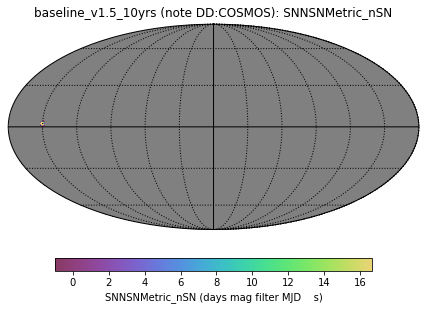

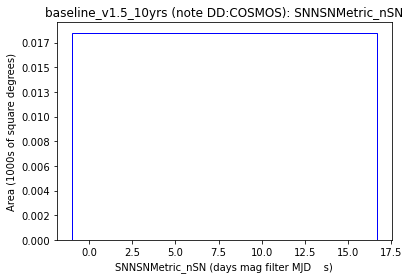

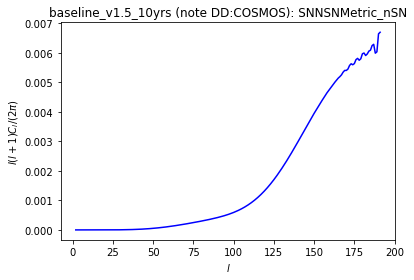

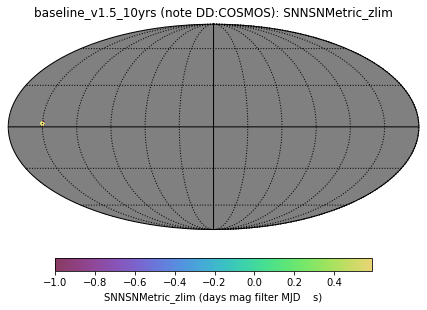

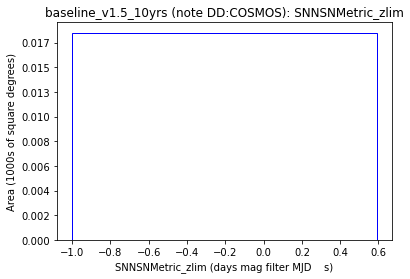

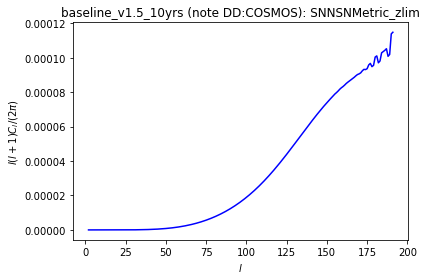

In [7]:
bgroup.plotAll(closefigs=False)
#import healpy as hp
#hp.mollview(bundleList[0].metricValues['nSN'])

In [8]:
bundleDict

{'baseline_v1_5_10yrs_SNNSNMetric_note_DD_COSMOS_HEAL': <lsst.sims.maf.metricBundles.metricBundle.MetricBundle at 0x7fdea2cbb0d0>,
 'SNNSNMetric_nSN': <lsst.sims.maf.metricBundles.metricBundle.MetricBundle at 0x7fde90128ee0>,
 'SNNSNMetric_zlim': <lsst.sims.maf.metricBundles.metricBundle.MetricBundle at 0x7fde90759640>}

In [9]:
bundleDict['SNNSNMetric_nSN'].metricValues

masked_array(data=[--, --, --, ..., --, --, --],
             mask=[ True,  True,  True, ...,  True,  True,  True],
       fill_value=-1.6375e+30)

/Users/yoachim/lsst/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.1/lib/python3.8/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_over(newcm(1.0))
/Users/yoachim/lsst/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.1/lib/python3.8/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_under(bgcolor)
/Users/yoachim/lsst/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.1/lib/python3.8/site-packages/healpy/projaxes.py:9

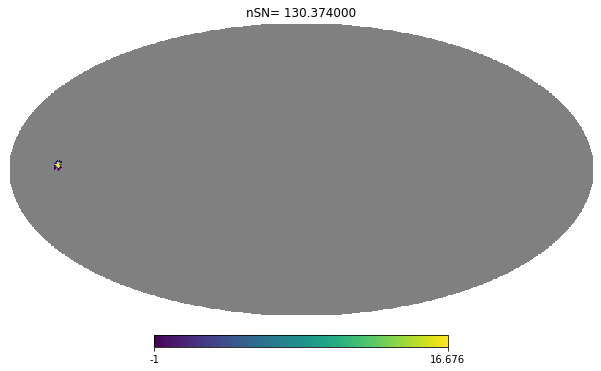

In [10]:
nSN = bundleDict['SNNSNMetric_nSN']
nSNValues = nSN.metricValues[~nSN.metricValues.mask]
nSNValues = nSNValues[nSNValues>-1]


hp.mollview(nSN.metricValues,title='nSN= %f' % np.sum(nSNValues))

/Users/yoachim/lsst/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.4.1/lib/python3.8/site-packages/numpy/core/fromnumeric.py:753: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


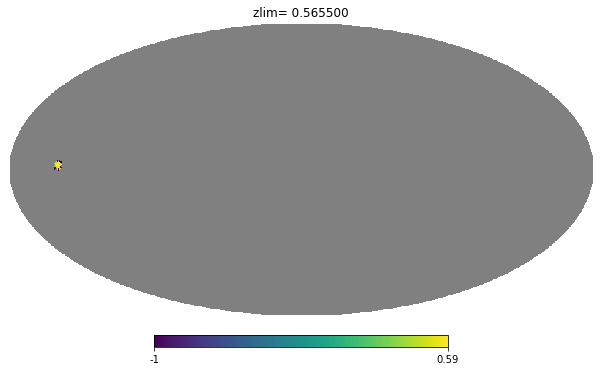

In [11]:
zlim = bundleDict['SNNSNMetric_zlim']
zlimValues = zlim.metricValues[~zlim.metricValues.mask]
zlimValues = zlimValues[zlimValues>-1]
hp.mollview(zlim.metricValues,title='zlim= %f' % np.median(zlimValues))

In [12]:
#bgroup.plotAll(closefigs=False)
#for vals in bundleList[0].metricValues:
#    print(vals)
restot = None
for val in bundleList:
    metValues = val.metricValues[~val.metricValues.mask]
    for vv in metValues:
        print(vv)
        if vv['nSN'] > 0.:
            if restot is None:
                restot = vv
            else:
                restot = np.concatenate((restot,vv))
                
#Now just make the plot manually
#print(restot.dtype)
#import healpy as hp
#hp.mollview(restot['nSN'],  title='sum= %f' % np.sum(restot['nSN']))

[(22762, 2.60163142, 0.07298144, 64, -1., -1.)]
[(22763, 2.62617511, 0.07298144, 64, -1., -1.)]
[(23017, 2.58935957, 0.06254076, 64, -1., -1.)]
[(23018, 2.61390326, 0.06254076, 64, 7.843, 0.5655, 27345)]
[(23019, 2.63844696, 0.06254076, 64, 1.053, 0.465, 27262)]
[(23274, 2.60163142, 0.05210691, 64, 12.127, 0.59, 27344)]
[(23275, 2.62617511, 0.05210691, 64, 16.676, 0.587, 27259)]
[(23276, 2.6507188, 0.05210691, 64, 0.41, 0.445, 27260)]
[(23529, 2.58935957, 0.04167873, 64, 2.038, 0.51, 27333)]
[(23275, 2.62617511, 0.05210691, 64, 16.676, 0.587, 27259)]
[(23531, 2.63844696, 0.04167873, 64, 15.89, 0.5875, 27257)]
[(23786, 2.60163142, 0.03125509, 64, 15.371, 0.587, 27247)]
[(23275, 2.62617511, 0.05210691, 64, 16.676, 0.587, 27259)]
[(23788, 2.6507188, 0.03125509, 64, 0.155, 0.3185, 27251)]
[(24041, 2.58935957, 0.02083484, 64, -1., -1.)]
[(23275, 2.62617511, 0.05210691, 64, 16.676, 0.587, 27259)]
[(24043, 2.63844696, 0.02083484, 64, 5.005, 0.519, 27250)]
[(24298, 2.60163142, 0.01041686, 64, 

In [13]:
print('nSn',np.sum(restot['nSN']),'zlim',np.median(restot['zlim']))

nSn 130.374 zlim 0.5654999999999999
